# Notebook to recreate reflectance diagram created in Nakajima and King

> Using the cloud.csv file
- single layer of cloud; ignore Rayleigh scattering

## Constant Effective Radius; varying dTau

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
df = pd.read_csv("../create_atm/atmospheres/cloud.csv", header = None, index_col = 0)

In [80]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.25,0.016458,0.002826,0.004044,0.002876,0.001470,0.001116,0.024836,0.006047,0.002519,0.002944,0.001722,0.001109
0.50,0.035540,0.006681,0.009410,0.006790,0.003520,0.002801,0.046376,0.015257,0.006246,0.006785,0.004139,0.002800
1.00,0.071985,0.016797,0.022653,0.016797,0.009175,0.007716,0.077382,0.036994,0.016570,0.016535,0.010616,0.007614
2.00,0.127127,0.041583,0.052386,0.040841,0.024703,0.021874,0.106889,0.077042,0.042153,0.039996,0.027289,0.020674
4.00,0.188354,0.087763,0.103477,0.086602,0.059899,0.055218,0.120132,0.128224,0.087843,0.083858,0.061375,0.048370
8.00,0.239893,0.147717,0.164858,0.146963,0.115245,0.109311,0.121798,0.172888,0.143886,0.140209,0.107136,0.085419
16.00,0.274672,0.206785,0.219768,0.204017,0.175919,0.170147,0.121821,0.196500,0.194757,0.191976,0.144558,0.113023
32.00,0.293391,0.252215,0.258086,0.245547,0.226404,0.222005,0.121821,0.201515,0.226035,0.224531,0.160579,0.122234


In [81]:
len(df)

8

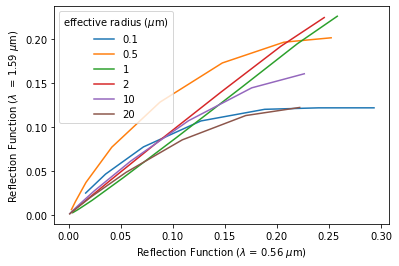

In [122]:
N_cloud = int(df.shape[1]/2)

for i in range(N_cloud):
    plt.plot(df[1+i], df[7+i])

plt.legend(['0.1','0.5','1','2','10','20'], title='effective radius ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

## Constant dTau; varying effective radius

In [83]:
import copy

In [84]:
df2 = df.T

In [85]:
df2

,0.25,0.50,1.00,2.00,4.00,8.00,16.00,32.00
1,0.016458,0.035540,0.071985,0.127127,0.188354,0.239893,0.274672,0.293391
2,0.002826,0.006681,0.016797,0.041583,0.087763,0.147717,0.206785,0.252215
3,0.004044,0.009410,0.022653,0.052386,0.103477,0.164858,0.219768,0.258086
4,0.002876,0.006790,0.016797,0.040841,0.086602,0.146963,0.204017,0.245547
5,0.001470,0.003520,0.009175,0.024703,0.059899,0.115245,0.175919,0.226404
6,0.001116,0.002801,0.007716,0.021874,0.055218,0.109311,0.170147,0.222005
7,0.024836,0.046376,0.077382,0.106889,0.120132,0.121798,0.121821,0.121821
8,0.006047,0.015257,0.036994,0.077042,0.128224,0.172888,0.196500,0.201515
9,0.002519,0.006246,0.016570,0.042153,0.087843,0.143886,0.194757,0.226035
10,0.002944,0.006785,0.016535,0.039996,0.083858,0.140209,0.191976,0.224531


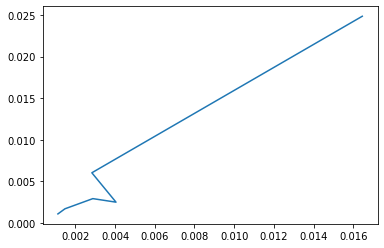

In [86]:
plt.plot(df2[0.25][0:6], df2[0.25][6:12])

In [87]:
dTau_range_cloud = []

for col in df2.columns:
    dTau_range_cloud.append(col)

In [88]:
dTau_range_cloud

[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

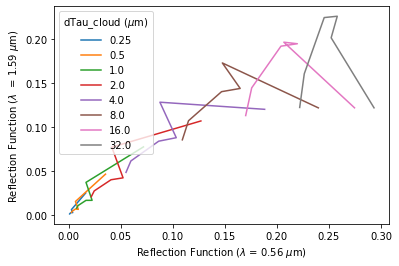

In [119]:
N_dTau_cloud = len(dTau_range_cloud)

fig, ax = plt.subplots()

for i in range(N_dTau_cloud):
    x = df2[dTau_range_cloud[i]][0:6]
    y = df2[dTau_range_cloud[i]][6:12]
    
    plt.plot(x,y)
    #ax.annotate(dTau_range_cloud, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')

plt.show()

> single plot only 

In [138]:
x = []
y = []

for i in range(N_cloud):
    x.append(df2[0.25][i+1])
    y.append(df2[0.25][i+7])
    
n = ['0.1','0.5','1','2','10','20']

<function matplotlib.pyplot.show(close=None, block=None)>

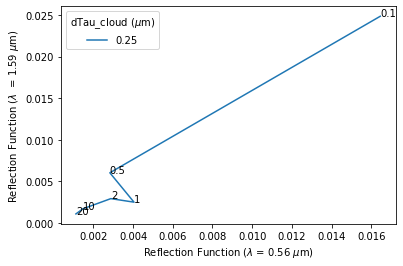

In [146]:
fig, ax = plt.subplots()
ax.plot(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show